In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as plt

## 讀取台灣youtuber資料

In [3]:
df = pd.read_html('https://zh.wikipedia.org/wiki/%E5%8F%B0%E7%81%A3YouTube%E9%A0%BB%E9%81%93%E8%A8%82%E9%96%B1%E4%BA%BA%E6%95%B8%E6%8E%92%E8%A1%8C%E6%A6%9C')

In [4]:
t_mil = df[1]

確認第一組dataframe為何

In [5]:
t_mil

,0,1,2,3,4,5,6,7,8,9,10
0,排名,主頻道,訂閱數,影片數,總觀看次數,建立日期,達標日期,達標天數,觀看次數最高影片,類型,NaN
1,1,這群人,2885756,183,633000662,2008年6月7日,100萬,2016年8月30日,3006,[video 1],戲劇、搞笑
2,200萬,2017年9月15日[2],3387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,阿滴英文,2167024,378,168570611,2015年1月11日,100萬,2017年7月7日,908,[video 2],英語教學
4,200萬,2019年1月11日[3],1461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,蔡阿嘎,2034713,575,446403141,2006年6月3日,100萬,2014年7月9日,2958,[video 3],台語教學、綜合
6,200萬,2019年3月16日[4],4659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


把第0列設為欄位名稱

In [6]:
colnames = t_mil.loc[0].values

In [7]:
t_mil.columns = colnames

In [8]:
t_mil = t_mil[1:]

將沒用的列去除

In [9]:
t_mil = t_mil[t_mil['影片數'].notnull()]

In [10]:
t_mil = t_mil.loc[:, '排名':'總觀看次數']

In [11]:
t_mil

,排名,主頻道,訂閱數,影片數,總觀看次數
1,1,這群人,2885756,183,633000662
3,2,阿滴英文,2167024,378,168570611
5,3,蔡阿嘎,2034713,575,446403141


In [11]:
o_mil = df[2]

In [12]:
o_mil.columns = o_mil.loc[0].values

In [13]:
o_mil = o_mil[1:]

In [14]:
o_mil = o_mil.loc[:, '排名':'總觀看次數']

In [15]:
o_mil

,排名,主頻道,訂閱數,影片數,總觀看次數
1,4,阿神,1841799,3620,728637595
2,5,谷阿莫,1650982,817,690863596
3,6,眾量級CROWD,1550083,360,388070571
4,7,聖結石,1468332,490,430259893
5,8,Joeman,1454320,1877,332290848
6,9,DE JuN,1426739,726,617090091
7,10,小玉,1374326,251,366896787
8,11,放火 Louis,1355561,204,180179222
9,12,安啾咪,1333206,194,177359875
10,13,WACKYBOYS 反骨男孩,1283129,515,347368012


# 將兩組Dataframe合併

In [16]:
mil = pd.concat([t_mil, o_mil])

轉換columns格式

In [17]:
mil[['訂閱數', '影片數', '總觀看次數']] = mil[['訂閱數', '影片數', '總觀看次數']].astype(int)

計算平均影片觀看數

In [18]:
mil['平均影片觀看次數'] = (mil.總觀看次數 / mil.影片數).astype(int)

In [19]:
mil['訂閱觀看率(%)'] = (mil.平均影片觀看次數 / mil.訂閱數 * 100).astype(int) 

# 排列出訂閱數與觀看次數之關係

In [20]:
mil

,排名,主頻道,訂閱數,影片數,總觀看次數,平均影片觀看次數,訂閱觀看率(%)
1,1,這群人,2875165,182,628721071,3454511,120
3,2,阿滴英文,2131224,375,163158969,435090,20
5,3,蔡阿嘎,2032251,571,442788376,775461,38
1,4,阿神,1841799,3620,728637595,201281,10
2,5,谷阿莫,1650982,817,690863596,845610,51
3,6,眾量級CROWD,1550083,360,388070571,1077973,69
4,7,聖結石,1468332,490,430259893,878081,59
5,8,Joeman,1454320,1877,332290848,177032,12
6,9,DE JuN,1426739,726,617090091,849986,59
7,10,小玉,1374326,251,366896787,1461740,106


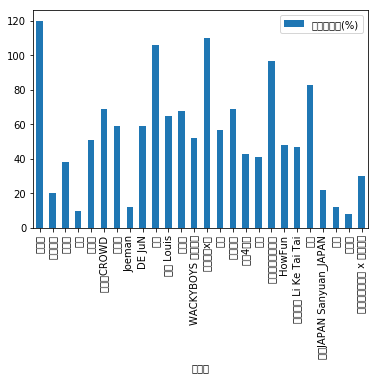

In [21]:
mil.plot.bar(x='主頻道', y=['訂閱觀看率(%)'])

In [22]:
mil.sort_values("訂閱觀看率(%)", ascending=False)

,排名,主頻道,訂閱數,影片數,總觀看次數,平均影片觀看次數,訂閱觀看率(%)
1,1,這群人,2875165,182,628721071,3454511,120
11,14,人生肥宅x尊,1244339,145,199380992,1375041,110
7,10,小玉,1374326,251,366896787,1461740,106
16,19,黃阿瑪的後宮生活,1131935,234,259172080,1107572,97
19,22,滴妹,1027376,97,83388501,859675,83
3,6,眾量級CROWD,1550083,360,388070571,1077973,69
13,16,白癡公主,1230164,159,135283525,850839,69
9,12,安啾咪,1333206,194,177359875,914226,68
8,11,放火 Louis,1355561,204,180179222,883231,65
4,7,聖結石,1468332,490,430259893,878081,59
